# Bike Sharing Assignment

## Multiple linear regression

#### Problem Statement:

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants —


- Which variables are significant in predicting the demand for shared bikes.

- How well those variables describe the bike demands.

## Step 1: Reading and Understanding the Data

Import NumPy and Pandas and read the dataset

In [1]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

In [3]:
bike_sharing_data_frame = pd.read_csv("day.csv")

In [4]:
# Observe the data
bike_sharing_data_frame.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
# Inspect the various aspects of the dataframe
bike_sharing_data_frame.shape

(730, 16)

In [6]:
bike_sharing_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
bike_sharing_data_frame.describe

<bound method NDFrame.describe of      instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0          1  01-01-2018       1   0     1        0        6           0   
1          2  02-01-2018       1   0     1        0        0           0   
2          3  03-01-2018       1   0     1        0        1           1   
3          4  04-01-2018       1   0     1        0        2           1   
4          5  05-01-2018       1   0     1        0        3           1   
..       ...         ...     ...  ..   ...      ...      ...         ...   
725      726  27-12-2019       1   1    12        0        4           1   
726      727  28-12-2019       1   1    12        0        5           1   
727      728  29-12-2019       1   1    12        0        6           0   
728      729  30-12-2019       1   1    12        0        0           0   
729      730  31-12-2019       1   1    12        0        1           1   

     weathersit       temp     atemp      hum  windsp

In [8]:
# checking for null values
bike_sharing_data_frame.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

## Looks like there are no null values.

In [9]:
# Dropping 'Instant' column as it is just index value.
bike_sharing_data_frame.drop(['instant'], axis = 1, inplace = True)

In [10]:
# Dropping dteday column as it is just a date column which is used to represent on which day data is collected.
bike_sharing_data_frame.drop(['dteday'], axis = 1, inplace = True)

# Dropping casual and registered columns cause we have 'cnt' column which represents total number of bookings in a day.
# We need not do any analysis based on casual and registered cause if user is registered or not does not have any significance.

bike_sharing_data_frame.drop(['casual', 'registered'], axis = 1, inplace = True)

In [11]:
bike_sharing_data_frame.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


In [12]:
bike_dup = bike_sharing_data_frame.copy()

# Checking for duplicates and dropping the entire duplicate row if any
bike_dup.drop_duplicates(subset=None, inplace=True)
bike_dup.shape

(730, 12)

In [13]:
bike_sharing_data_frame.shape

(730, 12)

#### Observation
#### There are no duplicates in the data

# Creating dummy variables using one hot encoding

In [14]:
bike_sharing_data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


In [15]:
print(bike_sharing_data_frame['yr'].unique())
print(bike_sharing_data_frame['mnth'].unique())
print(bike_sharing_data_frame['season'].unique())
print(bike_sharing_data_frame['weathersit'].unique())
print(bike_sharing_data_frame['weekday'].unique())


[0 1]
[ 1  2  3  4  5  6  7  8  9 10 11 12]
[1 2 3 4]
[2 1 3]
[6 0 1 2 3 4 5]


In [16]:
# Create Dummy variable
# Drop original variable for which the dummy was created

new_bike_sharing = pd.get_dummies(bike_sharing_data_frame,columns = ['yr', 'mnth','season','weathersit','weekday'],drop_first=True)

In [17]:
new_bike_sharing.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr_1,mnth_2,mnth_3,...,season_3,season_4,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [18]:
new_bike_sharing.describe()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr_1,mnth_2,mnth_3,...,season_3,season_4,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,0.028767,0.683562,20.319259,23.726322,62.765175,12.763620,4508.006849,0.500000,0.076712,0.084932,...,0.257534,0.243836,0.336986,0.028767,0.143836,0.142466,0.141096,0.142466,0.142466,0.143836
std,0.167266,0.465405,7.506729,8.150308,14.237589,5.195841,1936.011647,0.500343,0.266317,0.278971,...,0.437576,0.429689,0.473004,0.167266,0.351164,0.349767,0.348359,0.349767,0.349767,0.351164
min,0.000000,0.000000,2.424346,3.953480,0.000000,1.500244,22.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,13.811885,16.889713,52.000000,9.041650,3169.750000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,20.465826,24.368225,62.625000,12.125325,4548.500000,0.500000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,26.880615,30.445775,72.989575,15.625589,5966.000000,1.000000,0.000000,0.000000,...,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,35.328347,42.044800,97.250000,34.000021,8714.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [19]:
new_bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       730 non-null    int64  
 1   workingday    730 non-null    int64  
 2   temp          730 non-null    float64
 3   atemp         730 non-null    float64
 4   hum           730 non-null    float64
 5   windspeed     730 non-null    float64
 6   cnt           730 non-null    int64  
 7   yr_1          730 non-null    uint8  
 8   mnth_2        730 non-null    uint8  
 9   mnth_3        730 non-null    uint8  
 10  mnth_4        730 non-null    uint8  
 11  mnth_5        730 non-null    uint8  
 12  mnth_6        730 non-null    uint8  
 13  mnth_7        730 non-null    uint8  
 14  mnth_8        730 non-null    uint8  
 15  mnth_9        730 non-null    uint8  
 16  mnth_10       730 non-null    uint8  
 17  mnth_11       730 non-null    uint8  
 18  mnth_12       730 non-null    

### SPLITTING THE DATA
    > Splitting the data to Train and Test in 70:30 ratio
> We will use train_test_split method from sklearn package for this

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
train_data, test_data = train_test_split(new_bike_sharing, train_size = 0.70, test_size = 0.30, random_state = 333)

In [22]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 483 to 366
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       510 non-null    int64  
 1   workingday    510 non-null    int64  
 2   temp          510 non-null    float64
 3   atemp         510 non-null    float64
 4   hum           510 non-null    float64
 5   windspeed     510 non-null    float64
 6   cnt           510 non-null    int64  
 7   yr_1          510 non-null    uint8  
 8   mnth_2        510 non-null    uint8  
 9   mnth_3        510 non-null    uint8  
 10  mnth_4        510 non-null    uint8  
 11  mnth_5        510 non-null    uint8  
 12  mnth_6        510 non-null    uint8  
 13  mnth_7        510 non-null    uint8  
 14  mnth_8        510 non-null    uint8  
 15  mnth_9        510 non-null    uint8  
 16  mnth_10       510 non-null    uint8  
 17  mnth_11       510 non-null    uint8  
 18  mnth_12       510 non-null  

In [23]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 22 to 313
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   holiday       219 non-null    int64  
 1   workingday    219 non-null    int64  
 2   temp          219 non-null    float64
 3   atemp         219 non-null    float64
 4   hum           219 non-null    float64
 5   windspeed     219 non-null    float64
 6   cnt           219 non-null    int64  
 7   yr_1          219 non-null    uint8  
 8   mnth_2        219 non-null    uint8  
 9   mnth_3        219 non-null    uint8  
 10  mnth_4        219 non-null    uint8  
 11  mnth_5        219 non-null    uint8  
 12  mnth_6        219 non-null    uint8  
 13  mnth_7        219 non-null    uint8  
 14  mnth_8        219 non-null    uint8  
 15  mnth_9        219 non-null    uint8  
 16  mnth_10       219 non-null    uint8  
 17  mnth_11       219 non-null    uint8  
 18  mnth_12       219 non-null   

### EXPLORATORY DATA ANALYSIS


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
#visualizing numeric variables 
bike_numeric_variable_df_train = train_data[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

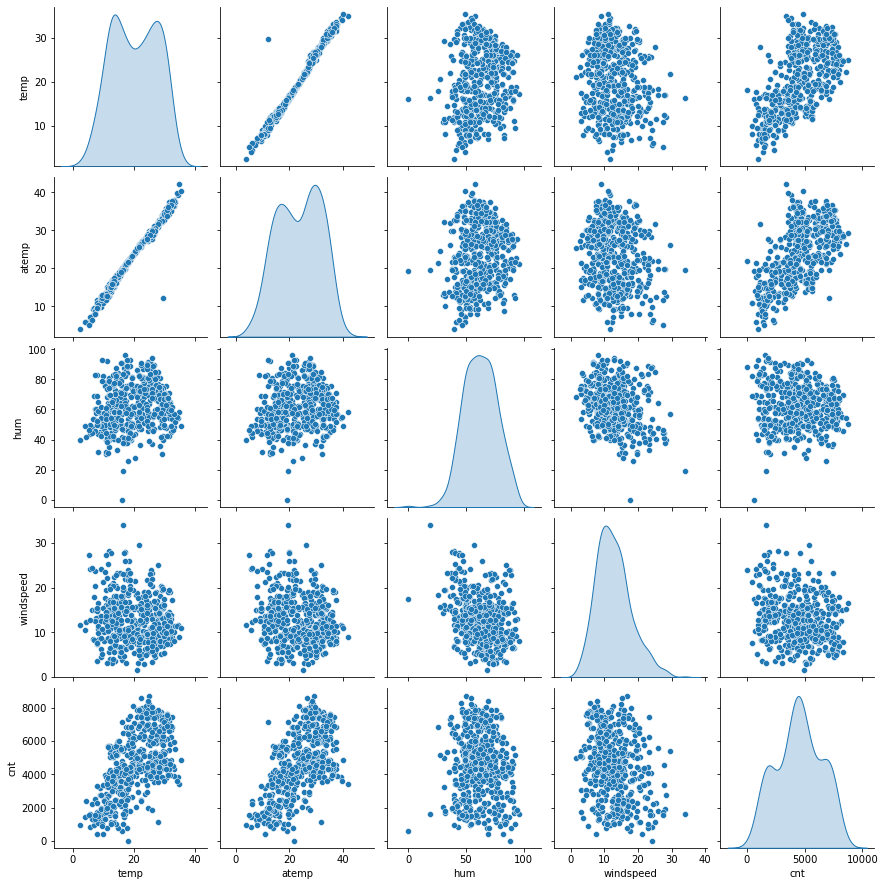

In [26]:
sns.pairplot(bike_numeric_variable_df_train, diag_kind='kde')
plt.show()

### Observation
<ol>
  <li>There is linearity between temp and cnt</li>
  <li>There is linearity between temp and atemp</li>
  <li>temp and atemp are higly correlated</li>
</ol>

<p> Since there is high correlation between temp and atemp I am going to consider atemp for analysis cause how much temp user feels will have effect on booking them actual temperature </p>

### Visualising Catagorical Variables

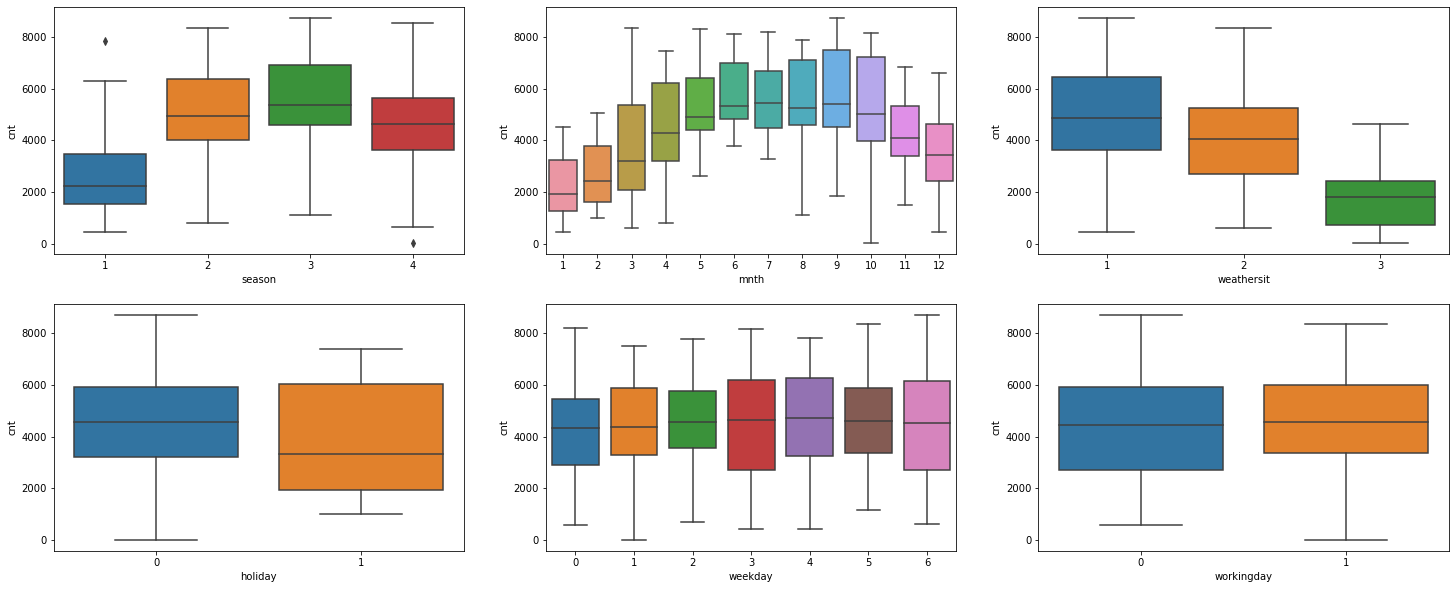

In [27]:
plt.figure(figsize=(25, 10))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing_data_frame)
plt.subplot(2,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing_data_frame)
plt.subplot(2,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing_data_frame)
plt.subplot(2,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing_data_frame)
plt.subplot(2,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing_data_frame)
plt.subplot(2,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing_data_frame)
plt.show()

### Observations

<ol>
    <li>Highest number of bookings are happening in fall(season 3). This can be used as a predictor</li>
    <li>Bookings tend to happen more when there is clear weather</li>
    <li>More bookings happening in months 5,6,7,8 & 9 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.</li>
</ol>

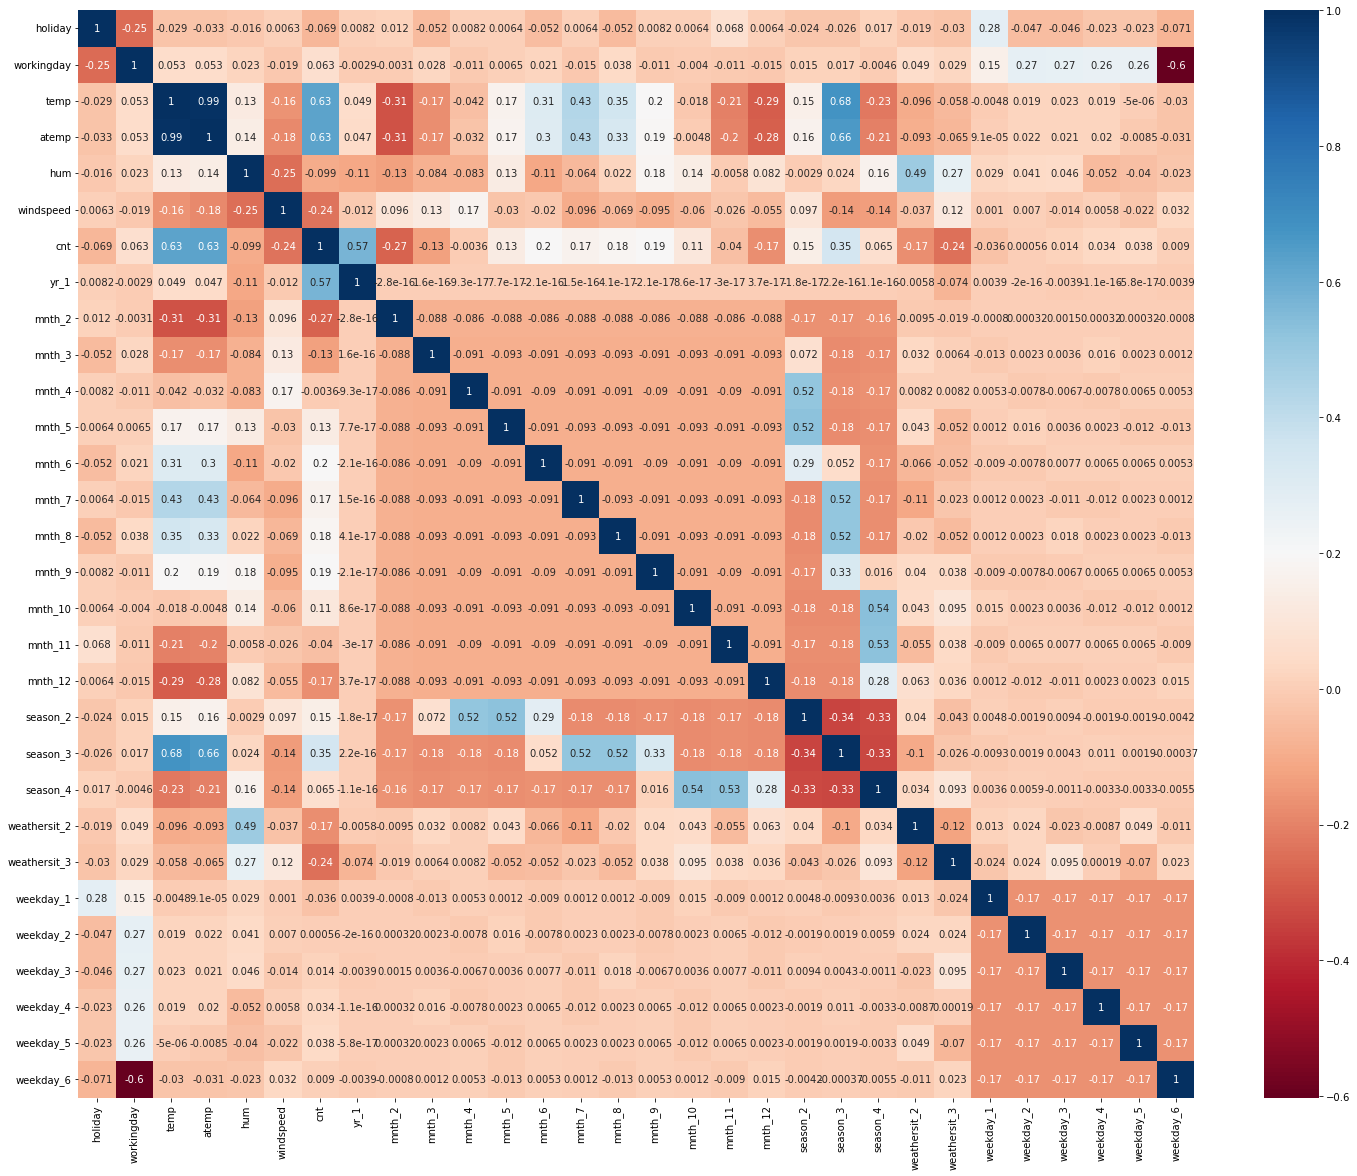

In [28]:
# cheking corelation between the variables

plt.figure(figsize = (25,20))
sns.heatmap(new_bike_sharing.corr(), annot = True, cmap="RdBu")
plt.show()

##### Rescaling the Features using Min-Max scaling

In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
scaler = MinMaxScaler()
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

train_data[num_vars] = scaler.fit_transform(train_data[num_vars])

In [31]:
train_data.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr_1,mnth_2,mnth_3,...,season_3,season_4,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
483,0,0,0.497426,0.487055,0.609956,0.194850,0.722734,1,0,0,...,0,0,0,0,0,0,0,0,0,0
650,0,0,0.416433,0.409971,0.513852,0.255118,0.815347,1,0,0,...,0,1,0,0,0,0,0,0,0,1
212,0,1,0.887856,0.819376,0.572294,0.276919,0.488265,0,0,0,...,1,0,0,0,1,0,0,0,0,0
714,0,0,0.378013,0.381804,0.871429,0.161523,0.433042,1,0,0,...,0,1,1,0,0,0,0,0,0,0
8,0,0,0.098690,0.048706,0.451083,0.700017,0.092039,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [32]:
new_bike_sharing.head()

,holiday,workingday,temp,atemp,hum,windspeed,cnt,yr_1,mnth_2,mnth_3,...,season_3,season_4,weathersit_2,weathersit_3,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6
0,0,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [33]:
#Converted the numeric variables into standard compariable values using min-max scalling

###  BUILDING A LINEAR MODEL
Dividing into X and Y sets for the model building

In [34]:
# "cnt" is the target variable which we need to predict
y_train = train_data.pop('cnt')
X_train = train_data

In [35]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [36]:
# Running RFE with the output number of the variable equal to 15
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 15)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [37]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))


[('holiday', False, 14),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('yr_1', True, 1),
 ('mnth_2', False, 7),
 ('mnth_3', True, 1),
 ('mnth_4', False, 3),
 ('mnth_5', False, 2),
 ('mnth_6', False, 4),
 ('mnth_7', False, 15),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', True, 1),
 ('mnth_11', False, 8),
 ('mnth_12', False, 9),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('weathersit_2', True, 1),
 ('weathersit_3', True, 1),
 ('weekday_1', False, 6),
 ('weekday_2', False, 13),
 ('weekday_3', False, 11),
 ('weekday_4', False, 12),
 ('weekday_5', False, 10),
 ('weekday_6', True, 1)]

In [38]:
col = X_train.columns[rfe.support_]
col

Index(['workingday', 'temp', 'atemp', 'hum', 'windspeed', 'yr_1', 'mnth_3',
       'mnth_9', 'mnth_10', 'season_2', 'season_3', 'season_4', 'weathersit_2',
       'weathersit_3', 'weekday_6'],
      dtype='object')

In [39]:
X_train.columns[~rfe.support_]

Index(['holiday', 'mnth_2', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_11', 'mnth_12', 'weekday_1', 'weekday_2', 'weekday_3',
       'weekday_4', 'weekday_5'],
      dtype='object')

In [40]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [41]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,384.22
2,atemp,363.12
3,hum,17.52
10,season_3,7.09
4,windspeed,4.71
0,workingday,4.61
9,season_2,3.54
11,season_4,3.01
12,weathersit_2,2.14
5,yr_1,2.02


In [42]:
import statsmodels.api as sm

# Add a constant
X_train_lm1 = sm.add_constant(X_train_rfe)

# Create a first fitted model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

In [43]:
lr1.params

const           0.195340
workingday      0.040787
temp            0.433878
atemp           0.058635
hum            -0.178382
windspeed      -0.184925
yr_1            0.228741
mnth_3          0.047149
mnth_9          0.100017
mnth_10         0.054370
season_2        0.130228
season_3        0.079599
season_4        0.153475
weathersit_2   -0.047472
weathersit_3   -0.271174
weekday_6       0.054618
dtype: float64

In [44]:
# Print a summary of the linear regression model obtained
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.28e-186
Time:                        15:18:05   Log-Likelihood:                 509.26
No. Observations:                 510   AIC:                            -986.5
Df Residuals:                     494   BIC:                            -918.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1953      0.030      6.576   

In [45]:
#Removing the variable 'atemp' based on its High p-value & High VIF
X_train_new = X_train_rfe.drop(["atemp"], axis = 1)

In [46]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,23.21
2,hum,17.23
9,season_3,7.01
0,workingday,4.60
3,windspeed,4.55
8,season_2,3.54
10,season_4,3.01
11,weathersit_2,2.14
4,yr_1,2.02
13,weekday_6,1.79


In [47]:
# Add a constant
X_train_lm2 = sm.add_constant(X_train_new)

# Create a first fitted model
lr2 = sm.OLS(y_train, X_train_lm2).fit()

In [48]:
# Check the parameters obtained

lr2.params

const           0.196221
workingday      0.040773
temp            0.489280
hum            -0.177805
windspeed      -0.187198
yr_1            0.228723
mnth_3          0.047295
mnth_9          0.100029
mnth_10         0.054438
season_2        0.130352
season_3        0.078664
season_4        0.153732
weathersit_2   -0.047620
weathersit_3   -0.271535
weekday_6       0.054705
dtype: float64

In [49]:
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     187.9
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          1.00e-187
Time:                        15:18:06   Log-Likelihood:                 509.17
No. Observations:                 510   AIC:                            -988.3
Df Residuals:                     495   BIC:                            -924.8
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1962      0.030      6.627   

Removing the variable 'hum' based on its Very High 'VIF' value.
Even though the VIF of hum is second highest, we decided to drop 'hum' and not 'temp' based on general knowledge that temperature can be an important factor for a business like bike rentals, and wanted to retain 'temp'.

In [50]:
X_train_new = X_train_new.drop(["hum"], axis = 1)


In [51]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,16.81
8,season_3,6.75
2,windspeed,4.27
0,workingday,4.11
7,season_2,3.51
9,season_4,2.89
3,yr_1,2.02
6,mnth_10,1.66
12,weekday_6,1.66
10,weathersit_2,1.54


In [52]:
# Add a constant
X_train_lm3 = sm.add_constant(X_train_new)

# Create a first fitted model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

In [53]:
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     192.2
Date:                Wed, 16 Mar 2022   Prob (F-statistic):          4.52e-184
Time:                        15:18:06   Log-Likelihood:                 497.71
No. Observations:                 510   AIC:                            -967.4
Df Residuals:                     496   BIC:                            -908.1
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0916      0.020      4.509   

In [54]:
#Dropping 'season_3', 'mnth_10', 'mnth_3' 
X_train_new = X_train_new.drop(["mnth_3"], axis = 1)

In [55]:
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,16.66
7,season_3,6.49
2,windspeed,4.22
0,workingday,4.07
6,season_2,3.45
8,season_4,2.76
3,yr_1,2.02
5,mnth_10,1.66
11,weekday_6,1.66
9,weathersit_2,1.53


In [56]:
X_train_lm4 = sm.add_constant(X_train_new)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

In [57]:
lr4.params

const           0.101578
workingday      0.043502
temp            0.457267
windspeed      -0.148191
yr_1            0.233703
mnth_9          0.091068
mnth_10         0.052923
season_2        0.125590
season_3        0.075997
season_4        0.138405
weathersit_2   -0.076135
weathersit_3   -0.318278
weekday_6       0.055026
dtype: float64

In [58]:
print(lr6.summary())

NameError: name 'lr6' is not defined

In [ ]:
#This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for 
#all the predictors seems to be significant. For now, we will consider this as our final model
#(unless the Test data metrics are not significantly close to this number).

In [ ]:
# predicting on train data
y_train_pred = lr4.predict(X_train_lm6)


In [ ]:
res = y_train-y_train_pred
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

In [ ]:
# From the above histogram, we could see that the Residuals are normally distributed.
#Hence our assumption for Linear Regression is valid.

In [ ]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_new.columns
vif['VIF'] = [variance_inflation_factor(X_train_new.values, i) for i in range(X_train_new.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

#### MAKING PREDICTION USING FINAL MODEL

In [ ]:
# Applying the scaling on the test sets
num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

test_data[num_vars] = scaler.transform(test_data[num_vars])

In [ ]:
test_data.head()

In [ ]:
# Dividing into X_test and y_test
y_test = test_data.pop('cnt')
X_test = test_data
X_test.info()

In [ ]:
#Selecting the variables that were part of final model.
col1=X_train_new.columns
X_test=X_test[col1]
# Adding constant variable to test dataframe
X_test_lm4 = sm.add_constant(X_test)
X_test_lm4.info()

In [ ]:
# Making predictions using the final model (lr6)

y_pred = lr4.predict(X_test_lm4)

In [ ]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16) 
plt.show()

#### R^2 Value for TEST

In [ ]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

In [ ]:
# Adjusted R^2 Value for TEST
r2=0.8237771139643629

In [ ]:
X_test.shape

In [ ]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

##### Final Result Comparison
<ul>
    <li>Train R^2 : 0.822</li>
 <li>Train Adjusted R^2 :0.818</li>
 <li>Test R^2 :0.823</li>
 <li>Test Adjusted R^2 :0.813</li>
 <li>This seems to be a really good model that can very well 'Generalize' various datasets.</li>
</ul>

#### Final report

# As per our final Model, the top 3 predictor variables that influences the bike booking are:

Temperature (temp) - A coefficient value of ‘0.5636’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.5636 units.
Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.3070’ indicated that, w.r.t Weathersit1, a unit increase in Weathersit3 variable decreases the bike hire numbers by 0.3070 units.
Year (yr) - A coefficient value of ‘0.2308’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2308 units.
So, it's suggested to consider these variables utmost importance while planning, to achive maximum Booking
The next best features that can also be considered are

season_4: - A coefficient value of ‘0.128744’ indicated that w.r.t season_1, a unit increase in season_4 variable increases the bike hire numbers by 0.128744 units.
windspeed: - A coefficient value of ‘-0.155191’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.155191 units.

#### NOTE:

The details of weathersit_1 & weathersit_3
weathersit_1: Clear, Few clouds, Partly cloudy, Partly cloudy
weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
The details of season1 & season4

season1: spring
season4: winter